$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\bv}{\mathbf{b}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
$

# Recurrent Neural Networks

With supervised learning, we have learned how we can make an agent develop its model to make an estimate for the given inputs. For this training, we feed relevant outputs for the inputs. For some problems, however, this approach does not work. For instance, prediction of tomorrow's weather or stock prices without knowing the changes over past weeks, months, or years can be naive. Knowing the changes or activities in the past will help tremendously in making a good prediction. 


We categorize this kind of data as sequential data (or time series), and RNN [(Rumelhart, et al.)](https://web.stanford.edu/class/psych209a/ReadingsByDate/02_06/PDPVolIChapter8.pdf) is very useful for predicting them. 
Thus, RNN has been applied to stock market, natural language processing (sentences, documents, or audio), or brain computer interfaces (electroencephalography signals).  

The RNN can be modeled as recursive connection on each neuron or on entire layer in the following figures. 


### Single Recurrent Neuron
$$
\yv_{(t)} = h( \Wm_x^\top \xv_{(t)} + \Wm_y^\top \yv_{(t-1)} + \bv)
$$

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/RNN.png)

<br/><br/><br/></br>

### Recurrent Layer of Neurons

$$
\yv_{(t)} = h( \Xm_{(t)} \Wm_x  + \Ym_{(t-1)} \Wm_y  + \bv)
$$

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/RNN_layerR.png)



Let us generalize the notation here for convenience. The layer of a neural network here can be defined a function $f$.
In the Figure 14-2., the output $\yv_{(2)}$ is obtained
$$
  \yv_{(2)} = f_\wv(y_{(1)}, \xv_{(2)})
$$  
where $\wv$ is the neural network weights. 

If we unfold the equation, 

$$
\begin{align}
  \yv_{(2)} &= f_\wv(y_{(1)}, \xv_{(2)} ) \\
          &= f_\wv(f_\wv(y_{(0)}, \xv_{(1)}), \xv_{(2)} ) = g( \xv_{(1)}, \xv_{(2)}) \\
          &= f_\wv(f_\wv(\xv_{(0)}), \xv_{(2)} ) = g( \xv_{(0)}, \xv_{(1)}, \xv_{(2)}).
\end{align}
$$  

In general, 
$$
  \yv_{(t)} = f_\wv(y_{(t-1)}, \xv_{(t)} ). 
$$


In [1]:
# preparation

import tensorflow as tf
# Common imports
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'   #TF2: to fix Jupyter down
from tensorflow import keras 

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

## Basic RNN

Basic RNN can be implemented by usng TensorFlow as follows. $Wx$ and $Wy$ are the weights for input and recurrent connections respectively. 

In [2]:

n_inputs = 3
n_neurons = 5

Wx = tf.Variable(tf.random.truncated_normal((n_inputs, n_neurons)))
Wy = tf.Variable(tf.random.truncated_normal((n_neurons, n_neurons)))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))





In [3]:
import numpy as np

X0 = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1 = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1


Y0 = tf.tanh(tf.matmul(X0.astype('float32'), Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1.astype('float32'), Wx) + b)


In [4]:
Y0,Y1

(<tf.Tensor: id=39, shape=(4, 5), dtype=float32, numpy=
 array([[-0.6068265 ,  0.8661063 , -0.8809572 ,  0.99483436, -0.99479336],
        [-0.9411529 , -0.9708269 , -0.9999963 ,  0.99994826, -1.        ],
        [-0.9925163 , -0.99996865, -1.        ,  0.99999934, -1.        ],
        [-0.9995022 , -1.        , -0.8123962 , -0.9999357 , -0.9999998 ]],
       dtype=float32)>, <tf.Tensor: id=48, shape=(4, 5), dtype=float32, numpy=
 array([[ 0.9211856 , -1.        , -1.        ,  0.99697685, -1.        ],
        [ 0.9735547 , -0.99133384,  0.26629108,  0.9550939 ,  0.81588995],
        [ 0.6606208 , -1.        , -0.99999994,  0.99817836, -1.        ],
        [ 0.90198666, -0.9998985 , -0.99950415, -0.13573444, -0.9999819 ]],
       dtype=float32)>)

### SimpleRNN

We can use keras.SimpleRNN to build the basic RNN. Copying the previous naive one step sample, we can make the network to be constructed as below. Note, here we don't consider training the network, but we simply observe the how the recurrent paths are constructed and how the output values are produced. Therefore, the weights are simple random and the output is random as well. 

In [5]:
X_batch = np.array([X0.reshape((1, -1)), X1.reshape(1, -1)])

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(12, input_shape=[None, 12])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)

pred = model.predict(X_batch.astype('float32'))
list(map(lambda x: x.reshape(X0.shape), pred))

[array([[ 0.9999959 , -0.99806684, -0.9998631 ],
        [ 0.9999944 ,  0.51852053, -0.97609   ],
        [ 0.9990336 ,  1.        , -0.4303947 ],
        [-0.9999454 , -0.45990396, -0.9999984 ]], dtype=float32),
 array([[ 0.58859044, -0.99993736, -0.9994876 ],
        [ 0.99990225, -0.9985461 , -0.4780142 ],
        [ 0.9999999 ,  0.99995995, -0.8724732 ],
        [-0.99999803, -0.99990237, -0.9590752 ]], dtype=float32)]

# Types of Inputs and Outputs

Depending on the shapes of inputs and outputs, we can categorize the RNN as below: seq2seq, seq2vec, vect2seq, and delayed seq2seq. 

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/RNN_IO.png)

# Backpropagation throuugh Time (BPTT)

Training an RNN with time series data can be done by unrolling the RNN and backpropagating as in regular feed forward neural networks. This is called BPTT. 

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/RNN_backprop.png)


# Time-Series Data

## BPTT with Keras

BPTT (actually Truncated BPTT) is implemented in Keras, so what you need to do is simply using the SimpleRNN or other RNN cells to build your network and train. If you are interested in discussions about BPTT and other variations, please take a look at: [Tallec and Ollivier, 2017](https://arxiv.org/pdf/1705.08209.pdf), [Werbos, 1990](http://axon.cs.byu.edu/~martinez/classes/678/Papers/Werbos_BPTT.pdf), [Gruslys, et al., 2016](https://arxiv.org/pdf/1606.03401.pdf). 

We start generating data as in the text. 

In [6]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

X_train.shape, y_train.shape


((7000, 50, 1), (7000, 1))

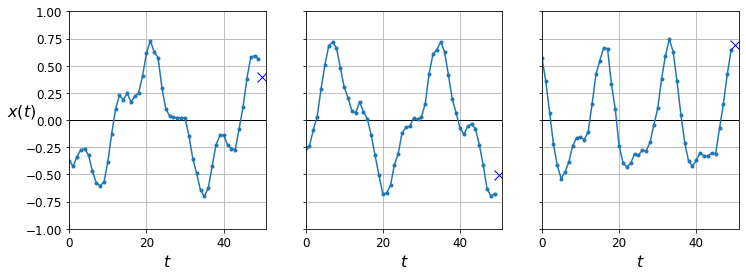

In [7]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()

## Training SimpleRNN

Let us build the network. Since the data is single dimensional, the input and output of RNN cell is one. 

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 17s 2ms/sample - loss: 0.0979 - val_loss: 0.0490
Epoch 2/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0371 - val_loss: 0.0297
Epoch 3/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0254 - val_loss: 0.0219
Epoch 4/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0199 - val_loss: 0.0177
Epoch 5/20
7000/7000 [==============================] - 12s 2ms/sample - loss: 0.0166 - val_loss: 0.0151
Epoch 6/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 7/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0133 - val_loss: 0.0124
Epoch 8/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0124 - val_loss: 0.0117
Epoch 9/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0119 - val_loss: 0.0112
Epoch 1

In [9]:
model.evaluate(X_valid, y_valid)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.01090382856875658

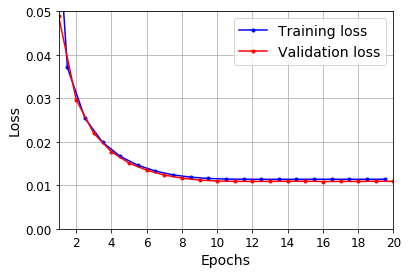

In [10]:

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

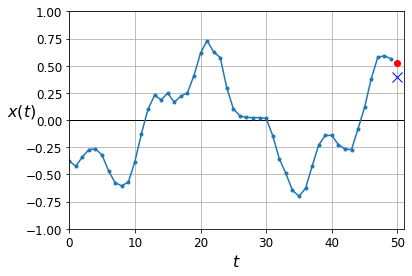

In [11]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Going Deeper

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 39s 6ms/sample - loss: 0.0531 - val_loss: 0.0083
Epoch 2/20
7000/7000 [==============================] - 43s 6ms/sample - loss: 0.0074 - val_loss: 0.0055
Epoch 3/20
7000/7000 [==============================] - 36s 5ms/sample - loss: 0.0054 - val_loss: 0.0050
Epoch 4/20
7000/7000 [==============================] - 37s 5ms/sample - loss: 0.0047 - val_loss: 0.0041
Epoch 5/20
7000/7000 [==============================] - 39s 6ms/sample - loss: 0.0044 - val_loss: 0.0041
Epoch 6/20
7000/7000 [==============================] - 40s 6ms/sample - loss: 0.0041 - val_loss: 0.0040
Epoch 7/20
7000/7000 [==============================] - 39s 6ms/sample - loss: 0.0038 - val_loss: 0.0035
Epoch 8/20
7000/7000 [==============================] - 41s 6ms/sample - loss: 0.0038 - val_loss: 0.0039
Epoch 9/20
7000/7000 [==============================] - 43s 6ms/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 1

In [13]:
model.evaluate(X_valid, y_valid)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0031113271843642

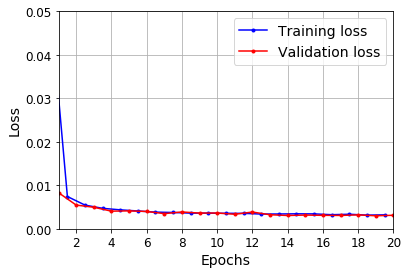

In [14]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

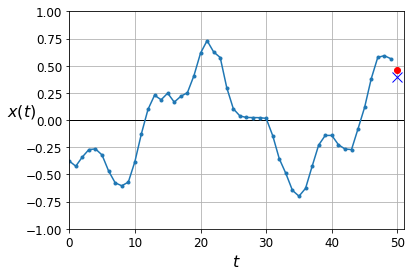

In [16]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])

## Multi-Step Prediction

Now, generate 10 more steps from the time series for testing and see if we can make the multiple-step prediction correctly. 

In [17]:
np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]


We can see how close the predictions are to the actual data. 

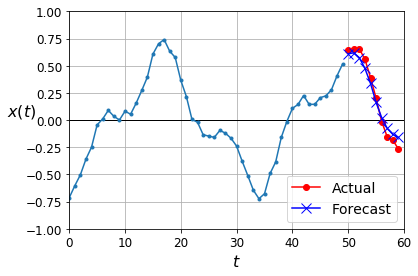

In [18]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()


## Training RNN for Multi-Step Prediction

Previously, we made a one-step prediction model and predicted multiple steps by iterating the one-step runs. Now, let us make our model to predict multiple steps. For this, we need to make the target output to be multi-dimensional (ten dimension), which is shifted by one time step from the input. That is, when input is 1 to 10, the output is 2 to 11.   

In [23]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

X_train.shape, Y_train.shape


((7000, 50, 1), (7000, 50, 10))

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 31s 4ms/sample - loss: 0.0502 - last_time_step_mse: 0.0392 - val_loss: 0.0422 - val_last_time_step_mse: 0.0309
Epoch 2/20
7000/7000 [==============================] - 27s 4ms/sample - loss: 0.0403 - last_time_step_mse: 0.0293 - val_loss: 0.0361 - val_last_time_step_mse: 0.0275
Epoch 3/20
7000/7000 [==============================] - 29s 4ms/sample - loss: 0.0409 - last_time_step_mse: 0.0343 - val_loss: 0.0394 - val_last_time_step_mse: 0.0325
Epoch 4/20
7000/7000 [==============================] - 27s 4ms/sample - loss: 0.0323 - last_time_step_mse: 0.0219 - val_loss: 0.0291 - val_last_time_step_mse: 0.0186
Epoch 5/20
7000/7000 [==============================] - 26s 4ms/sample - loss: 0.0281 - last_time_step_mse: 0.0170 - val_loss: 0.0263 - val_last_time_step_mse: 0.0148
Epoch 6/20
7000/7000 [==============================] - 26s 4ms/sample - loss: 0.0247 - last_time_step_mse: 0.0129 - 

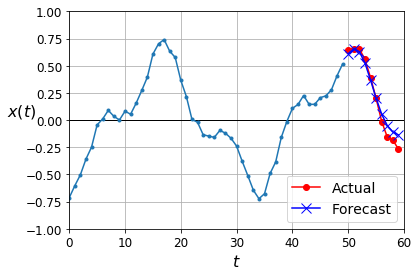

In [25]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

# Long-Short Term Memory (LSTM)

Introducing self-loops, [Hochreiter and Schmidhuber](https://www.bioinf.jku.at/publications/older/2604.pdf) proposed a model that can produce paths where the gradient can flow for long durations. 
Thus, the network can learn what to store in the long-term state, what to throw away, and what to read from it. 

When the long-term state $c_{(t–1)}$ traverses the network from left to right, a forget gate drops some memories, and then it adds some new memories via the addition operation.

The short-term state $h_{(t-1)}$ and the current state $\xv_{(t)}$ are used to control the input, forget, and output gates, and to produce outputs. 

LSTM has shown its effective memorization and retrieval via long-term states to capture long-term patterns in diverse applications. 

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/RNN_LSTM.png)


In [26]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])


np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 53s 8ms/sample - loss: 0.0766 - last_time_step_mse: 0.0628 - val_loss: 0.0555 - val_last_time_step_mse: 0.0371
Epoch 2/20
7000/7000 [==============================] - 51s 7ms/sample - loss: 0.0480 - last_time_step_mse: 0.0284 - val_loss: 0.0426 - val_last_time_step_mse: 0.0223
Epoch 3/20
7000/7000 [==============================] - 52s 7ms/sample - loss: 0.0391 - last_time_step_mse: 0.0186 - val_loss: 0.0375 - val_last_time_step_mse: 0.0173
Epoch 4/20
7000/7000 [==============================] - 55s 8ms/sample - loss: 0.0352 - last_time_step_mse: 0.0154 - val_loss: 0.0334 - val_last_time_step_mse: 0.0133
Epoch 5/20
7000/7000 [==============================] - 57s 8ms/sample - loss: 0.0327 - last_time_step_mse: 0.0134 - val_loss: 0.0316 - val_last_time_step_mse: 0.0124
Epoch 6/20
7000/7000 [==============================] - 57s 8ms/sample - loss: 0.0311 - last_time_step_mse: 0.0125 - 

In [28]:
model.evaluate(X_valid, Y_valid)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0237569155395031, 0.0086387]

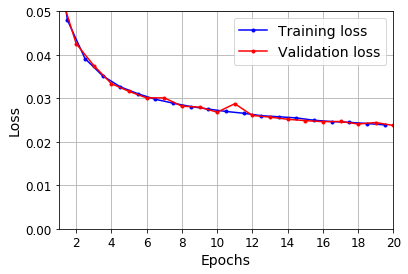

In [29]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

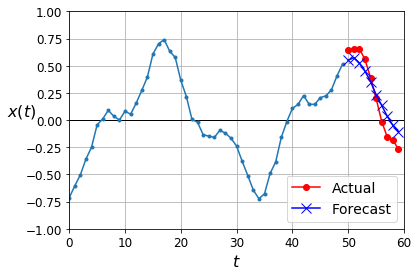

In [30]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

# Gated Recurrent Unit (GRU)

[Cho, et al. ](https://arxiv.org/pdf/1406.1078.pdf) proposed a simplified version of LSTM, which perform still as well. The long-term and short-term states are merged into a single vector, and gate control is much simplified (no output gate and single gate controller for forget and input). 

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/RNN_GRU.png)


In [31]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 55s 8ms/sample - loss: 0.0745 - last_time_step_mse: 0.0668 - val_loss: 0.0526 - val_last_time_step_mse: 0.0413
Epoch 2/20
7000/7000 [==============================] - 47s 7ms/sample - loss: 0.0478 - last_time_step_mse: 0.0369 - val_loss: 0.0441 - val_last_time_step_mse: 0.0326
Epoch 3/20
7000/7000 [==============================] - 48s 7ms/sample - loss: 0.0420 - last_time_step_mse: 0.0306 - val_loss: 0.0395 - val_last_time_step_mse: 0.0275
Epoch 4/20
7000/7000 [==============================] - 47s 7ms/sample - loss: 0.0375 - last_time_step_mse: 0.0250 - val_loss: 0.0346 - val_last_time_step_mse: 0.0205
Epoch 5/20
7000/7000 [==============================] - 48s 7ms/sample - loss: 0.0327 - last_time_step_mse: 0.0178 - val_loss: 0.0311 - val_last_time_step_mse: 0.0156
Epoch 6/20
7000/7000 [==============================] - 50s 7ms/sample - loss: 0.0309 - last_time_step_mse: 0.0157 - 

In [33]:
model.evaluate(X_valid, Y_valid)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.024027100875973702, 0.010358047]

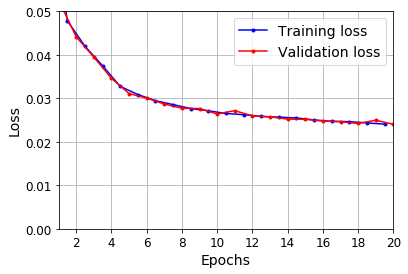

In [34]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

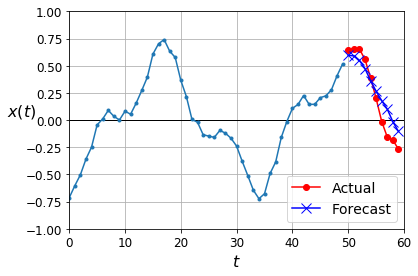

In [35]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

# Natural Language Processing

One of most popular applications of RNN is NLP such as machine translation (figure below), text summarization, parsing, sentiment analysis, dialogue generation, and etc. 

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/RNN_machine_translation.png)


# Brain Computer Interfaces 


<table>
<tr>
<td>
<img src="http://www.cs.colostate.edu/~anderson/wp/wp-content/uploads/2017/08/bciuser.jpg" width=400/>
</td>
<td>
<img src="https://cdn.technologyreview.com/i/legacy/eeg_x220.jpg?sw=280" />
</td>
</tr>
</table>

[Forney, et al.](http://www.elliottforney.com/wp-content/uploads/forney2015echo.pdf) suggested a interesting way to generate EEG signal with RNN. Although it is fake signal, it models the noisy EEG signals for different tasks successfully. 
